### Topics

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np

%load_ext sql_magic
%matplotlib inline

In [3]:
new_articles = pd.read_csv("../../data/processed/query_results/content_quality/final_frame_updated_pv_topcs.csv", sep=',', encoding = 'utf-8', parse_dates=True) 
interim = pd.read_csv("../../data/processed/query_results/content_quality/interim_frame_updated.csv", sep=',', encoding = 'utf-8', parse_dates=True)

In [12]:
interim_frame_updated_pv_topics_suggs = pd.read_csv("../../data/processed/query_results/content_quality/5_interim_frame_updated_w_g_suggs.csv", sep=',', encoding = 'utf-8') 

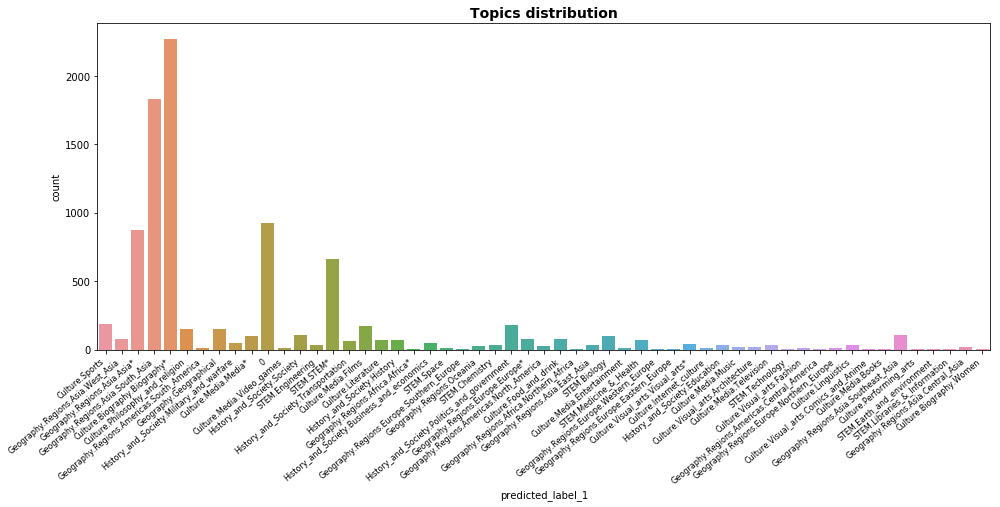

In [16]:
label1 = interim_frame_updated_pv_topics_suggs.predicted_label_1.unique()

## Plotting an histogram with the neighborhoods sorted alphabetically. 
plt.figure(figsize=(16,6))
ax = sns.countplot(x='predicted_label_1', data=interim_frame_updated_pv_topics_suggs, order=label1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Topics distribution', fontsize=14, fontweight='bold')
plt.show()

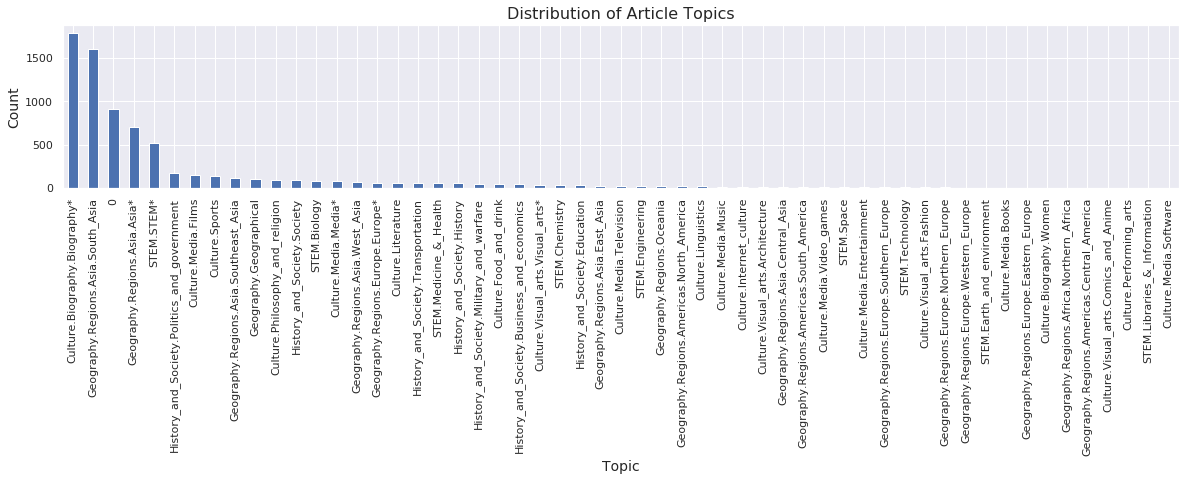

In [39]:
#discover which topics are most represented
new_articles['predicted_label_1'].value_counts().plot(kind='bar', figsize=(20,3))
plt.xlabel('Topic', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Article Topics',fontsize=16)

plt.show;

In [104]:
new_articles['predicted_label_1'].value_counts().nlargest(30)

Culture.Biography.Biography*                   1793
Geography.Regions.Asia.South_Asia              1605
0                                               913
Geography.Regions.Asia.Asia*                    703
STEM.STEM*                                      522
History_and_Society.Politics_and_government     176
Culture.Media.Films                             150
Culture.Sports                                  143
Geography.Regions.Asia.Southeast_Asia           109
Geography.Geographical                          107
Culture.Philosophy_and_religion                  95
History_and_Society.Society                      86
STEM.Biology                                     80
Culture.Media.Media*                             76
Geography.Regions.Asia.West_Asia                 67
Geography.Regions.Europe.Europe*                 61
Culture.Literature                               58
History_and_Society.Transportation               56
STEM.Medicine_&_Health                           55
History_and_

In [42]:
#create a list of top 25 topics to get a better view of those
top_25_topics_list = list(new_articles['predicted_label_1'].value_counts().nlargest(25).index)

In [62]:
top_25_topics = new_articles['predicted_label_1'].value_counts().nlargest(25).rename_axis('topics').reset_index(name='counts')

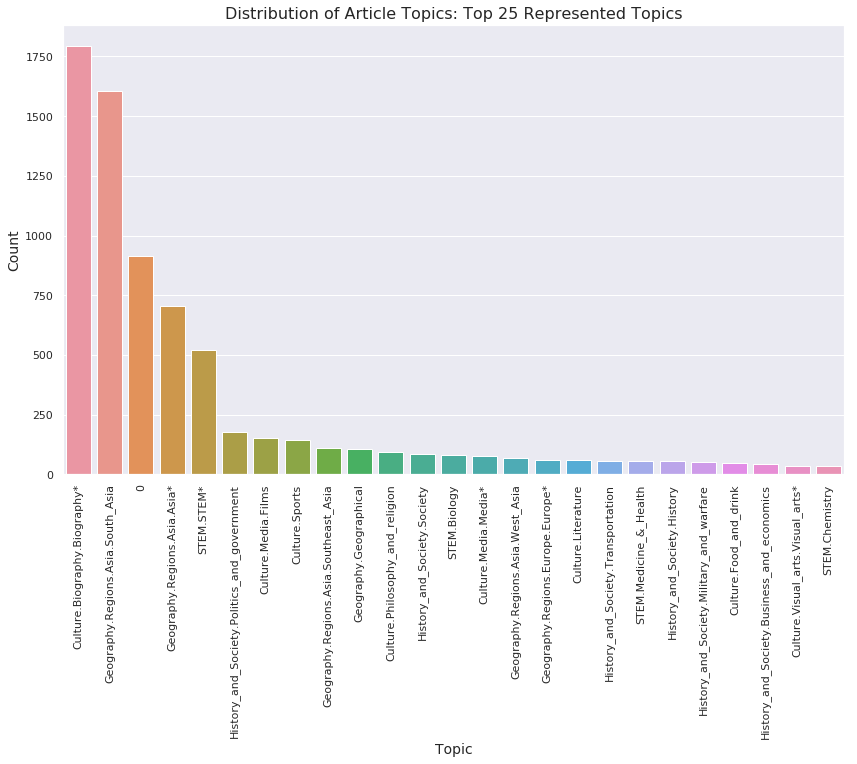

In [38]:
sorted_topic = new_articles['predicted_label_1'].value_counts().head(25).index
sns.set(style='darkgrid')
g = sns.countplot(data=new_articles, x='predicted_label_1', order = sorted_topic, orient='h')
plt.xticks(rotation=90)
plt.xlabel('Topic', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Article Topics: Top 25 Represented Topics', fontsize=16)

g.figure.set_figwidth(14)
g.figure.set_figheight(8.27)


#plt.figure(figsize=(15,16))
#plt.rcParams['figure.figsize']=(10,18)
#sns.set(rc={'figure.figsize': (2,6)})
#plt
#figure(num=None, figsize=(1,1), dpi=80, facecolor='w', edgecolor='k');

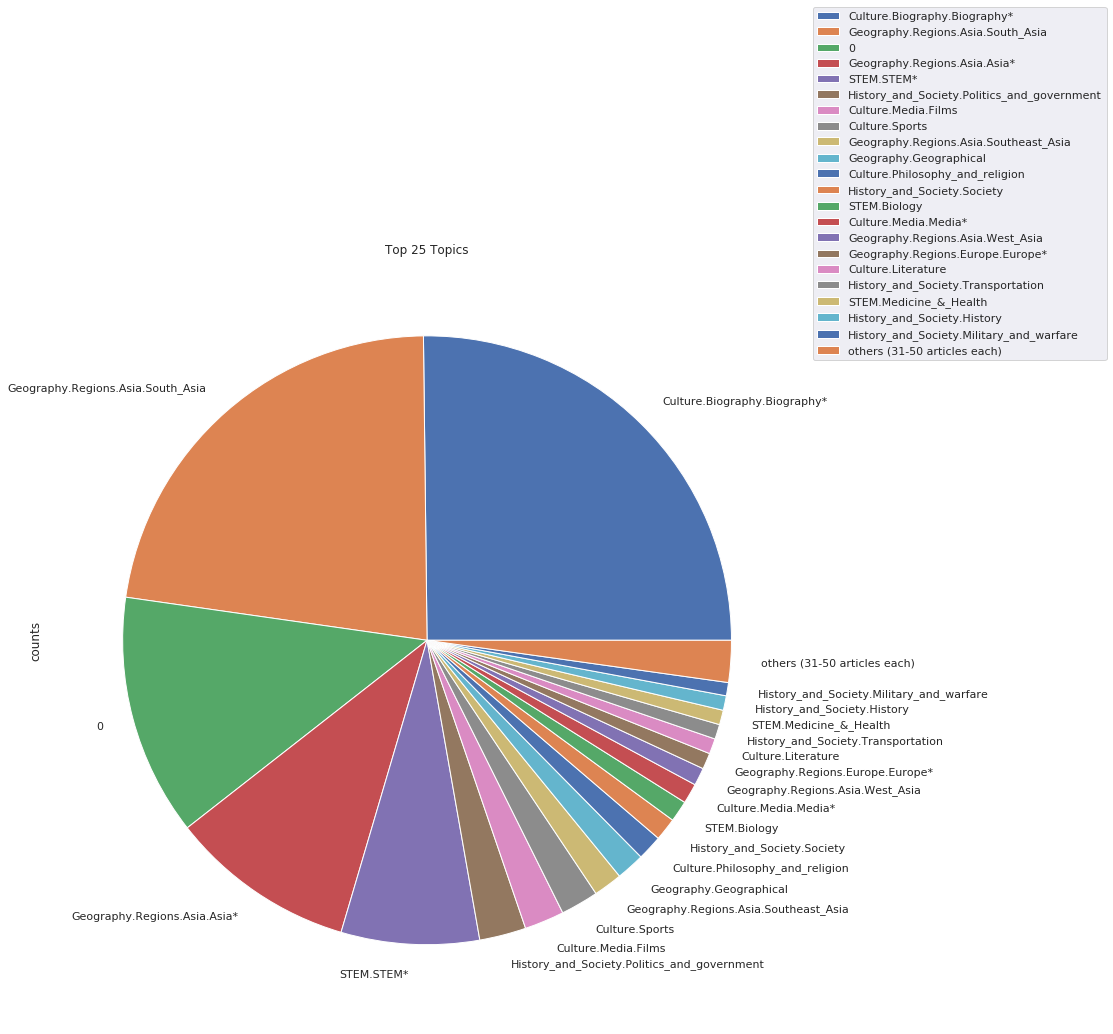

In [105]:
#others
new_row = pd.DataFrame(data = {
    'topics' : ['others (31-50 articles each)'],
    'counts' : [top_25_topics['counts'][21:].sum()]
})

#combining top with others
df2 = pd.concat([top_25_topics[:21], new_row],sort=True)

#plotting -- for comparison left all countries and right 
#the others combined
fig, ax = plt.subplots(figsize = (19,14))

#top_25_topics.plot(kind = 'pie', y = 'counts', labels = top_25_topics['topics'], ax = axes[0])
df2.plot(kind = 'pie', y = 'counts', labels = df2['topics'], ax = ax)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 1.1))

#axes[0].set_title('all topics')
ax.set_title('Top 25 Topics')

plt.show()